## 고급파이썬프로그래밍 6주차

### NLTK Inaugural

In [2]:
!pip install nltk
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to /Users/minizi/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/minizi/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [4]:
brown = nltk.corpus.brown

In [5]:
#cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) #fileids
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [6]:
# modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    
    for word in brown.words(categories=genre) #genre와 modal 연결
        if word.lower() == modal #word에서 modal 추출
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


#### Inaugural
- 연설문 코퍼스

In [9]:
inaugural = nltk.corpus.inaugural

In [ ]:
inaugural.fileids() #연도-이름.txt | '2021-Biden.txt'

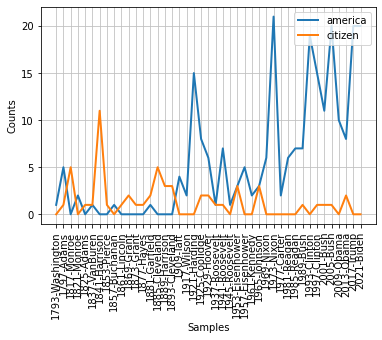

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
# ['america', 'citizen'] 빈도수 cfd로 만드시오
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid) 
        if word.lower() == target_word
        #if target_word in word.lower()
        #if word.lower().startswith(target_word)
)
cfd2.plot()

### Tuple & List
- 불변 객체 vs. 가변 객체

In [20]:
#1. 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [23]:
#1.1 요소 여러개일때 
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' #더 간편
alphabetT

alphabetL = ['a', 'b']

In [24]:
#1.2 요소 1개일때
alphaT = ('a') #str
alphaT = ('b',) #tuple
type(alphaT)

tuple

- packing: 한 변수에 여러 데이터 할당
    - list, tuple 자체. a = [1, 2, 3, 4]
- unpacking: 한 변수에 여러 데이터가 들어있을때 여러 변수에 나누는것
    - a = 'k', b = 'i', c = 'm'

In [25]:
a, b, c = 'kim' #unpacking
a, b, c

('k', 'i', 'm')

In [27]:
# 값 교환하기
pwd = 'abcd'
userid = 'sky'

"""
temp1 = userid
temp2 = pwd
pwd = temp1
userid = temp2""" #번거로움

pwd, userid = userid, pwd #간편하게 값교환 가능
pwd, userid

('sky', 'abcd')

In [28]:
# 연산
('a',) + (1, 2)

('a', 1, 2)

In [29]:
(1, 2)*3

(1, 2, 1, 2, 1, 2)

In [31]:
x = ('a',)
y = (1, 2)
id(x), id(x+y) #x+y는 x가 아니므로 x는 불변

(140666622746480, 140667241738752)

In [32]:
#비교
x = 1, 2
y = 1, 6
x < y

True

In [34]:
#순회
for i in x:
    print(x)

(1, 2)
(1, 2)


In [37]:
[i for i in x] #튜플 -> 리스트 #가장 많이 사용

[1, 2]

In [ ]:
#tuple comprehension? 리스트 -> 튜플 (필요한 경우아니면 사용 X)
tuple([i for i in x])
*[i for i in x], #느림

In [53]:
#형변환
dog = 'dog'
dogT = tuple(dog)
dogT

('d', 'o', 'g')

In [44]:
(dog,)

('dog',)

In [45]:
list(dog)

['d', 'o', 'g']

In [46]:
# slicing
dogT[0]

'd'

[정리]
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들수 있다. 타인의 접근을 막는다.
        - blue = 1, white = 2,...
    - 메모리 사용이 적음
- list 장점
    - 튜플 장점 필요없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있음 vs. set

### 리스트의 유용한 함수들
- 변경, 삭제, 추가
- 리스트 컴프리헨션 업그레이드

list('abcd')

In [69]:
num = list(range(6))
num

[0, 1, 2, 3, 4, 5]

In [70]:
#추가
num.append(6) #맨 뒤에 요소 1개 추가

In [71]:
num

[0, 1, 2, 3, 4, 5, 6]

In [72]:
# insert(index, item) #원하는 위치에 원하는 요소 추가
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 5, 6]

In [73]:
#여러개 추가
x = [6, 6, 6]
num.extend(x) # 리스트로 리스트 확장
num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6]

In [75]:
num.append(x) #x 리스트 형태로 추가
num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6]]

In [76]:
num += x
num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6], 6, 6, 6]

In [77]:
#offset
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6], 6, 6, 6]

In [78]:
#slice
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6], 6, 6, 6]

In [80]:
num[:3] = 'cat'
num

['c', 'a', 't', 2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6], 6, 6, 6]

In [81]:
#삭제
del num[:3]
num

[2, 3, 4, 5, 6, 6, 6, 6, [6, 6, 6], [6, 6, 6], 6, 6, 6]

In [83]:
#remove(value)
num.remove([6, 6, 6])
num

[3, 4, 5, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [ ]:
#pop(index) 기본값 = -1(맨 뒤에 값 제거)

In [85]:
num.pop(0)
num

[4, 5, 6, 6, 6, 6, [6, 6, 6], 6, 6]

In [ ]:
#clear
num.clear()
num

[]

In [87]:
# 인덱스
num = list(range(5))
num.index(4)

4

In [88]:
0 in num

True

In [90]:
# 정렬: sort(), sorted()
sorted(num, reverse=True) #변한 값만 복사해서 출력

[4, 3, 2, 1, 0]

In [91]:
num

[0, 1, 2, 3, 4]

In [92]:
num.sort(reverse=True) #리스트.sort(), 값을 할당하지 않아도 됨

In [93]:
num

[4, 3, 2, 1, 0]

In [99]:
#reverse(), reversed()
num.reverse() #값반환 안함

In [100]:
reversed(num) #값반환

In [101]:
# 할당
a = list(range(1, 5))
a

[1, 2, 3, 4]

In [102]:
b = a #메모리주소 참조하는 것 (id)
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [103]:
id(a), id(b)

(140667241950720, 140667241950720)

In [104]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)

(140667241950720, 140667241950528, 140666355775744, 140667241950784)

In [105]:
# deep copy: 깊은 복사, 하위에 중첩된 리스트 요소가 안바뀌도록
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [106]:
f = a.copy()
id(a), id(f)

(140667241950720, 140666355764672)

In [108]:
f[-1][0] = 9 #얕은 복사로 a, f 둘다 바뀜
a, f

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [109]:
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [110]:
g[-1][0] = 10 #깊은 복사로 g만 변화함
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [113]:
# 순회 : zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]
# (name, age)
for item1, item2 in zip(name, age): #여러 리스트 동시 순회 길이 다를경우 짧은 리스트 기준 종료
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [112]:
for item1 in name:
    for item2 in age:
        print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [114]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [115]:
# 리스트 + 인덱스 = enumerate
for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [118]:
# list(zip(name, age)) -> 리스트컴
[(i, j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [124]:
# name, age 이용해서 새로운 리스트 생성 (이름, 나이), for문 사용
new_list = []
for i, j in zip(name, age):
    new_list.append((i,j)) #append 사용
print(new_list)

[('kate', 77), ('royce', 44), ('phill', 54)]


In [125]:
[(i, j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [130]:
#1. for 문을 리.컴으로 바꾸기
"""for i in name:
    for j in age:
        print(i, j)"""
[(i, j) for i in name for j in age]

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [134]:
#2. [i, j] 리스트의 리스트로 바꿔보기 (리.컴)
[[(i, j) for i in name] for j in age]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [136]:
sentence = 'do not judge a book by its cover'
#[(대문자, 첫글자대문자, 글자수)...] 리스트 만들기

In [142]:
[(i.upper(), i.title(), len(i)) for i in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [149]:
text = [['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
        ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']]
#1. 문장마다 스트링으로 변화해서 리스트로 반환
         #['문징1', '문장2']
#2. 전체를 스트링으로 반환
         # '문장1 문장2'
#3. 전체 단어 리스트 가져오기
        # [sunja, said, goodnight,..]

In [155]:
[' '.join(sent) for sent in text] #1

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [156]:
' '.join([' '.join(sent) for sent in text]) #2

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [157]:
[word for sent in text for word in sent] #3

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [159]:
# if문 - else
[i for i in range(10)] # 짝수 가져오고 홀수 -> '홀수'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [160]:
[i for i in range(10) if i%2 == 0 else '홀수'] #no

SyntaxError: invalid syntax (3963976251.py, line 1)

In [161]:
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [162]:
#brown 정제하기
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [226]:
brown.raw(categories='romance')[:5000] 
#문장분절 -> 단어분절 # [[they, neither, ...], []]
#불필요한 것들 제거 
    #문장부호, POS, 'she's->she, is, don't-> do, not, '-'->''

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo